In [1]:
import numpy as np
import pandas as pd
import math

x_train = np.loadtxt('./data_digits_8_vs_9_noisy/x_train.csv', delimiter=',', skiprows=1)
x_test = np.loadtxt('./data_digits_8_vs_9_noisy/x_test.csv', delimiter=',', skiprows=1)

y_train = np.loadtxt('./data_digits_8_vs_9_noisy/y_train.csv', delimiter=',', skiprows=1)
y_test = np.loadtxt('./data_digits_8_vs_9_noisy/y_test.csv', delimiter=',', skiprows=1)


In [6]:
# 1-1;
import sklearn.linear_model as lm
import sklearn.metrics as m

scores = []
losses = []
list = []
co = []
model = 0
for i in range(1, 41):
    list.append(i)

for i in list:
    lib_model = lm.LogisticRegression(max_iter=i,solver='liblinear')
    
    lib_model.fit(x_train,y_train)
    score=lib_model.score(x_train,y_train)
    scores.append(score)
    
    
    prob=lib_model.predict_proba(x_train)
    loss=m.log_loss(y_train,prob)
    losses.append(loss)
    
    co.append(lib_model.coef_)
    model = lib_model

    



C:\Users\12866\miniconda3\envs\ml135_env_sp21\lib\site-packages\sklearn\svm\_base.py:1206: ConvergenceWarning: Liblinear failed to converge, increase the number of iterations.
  warnings.warn(
C:\Users\12866\miniconda3\envs\ml135_env_sp21\lib\site-packages\sklearn\svm\_base.py:1206: ConvergenceWarning: Liblinear failed to converge, increase the number of iterations.
  warnings.warn(
C:\Users\12866\miniconda3\envs\ml135_env_sp21\lib\site-packages\sklearn\svm\_base.py:1206: ConvergenceWarning: Liblinear failed to converge, increase the number of iterations.
  warnings.warn(
C:\Users\12866\miniconda3\envs\ml135_env_sp21\lib\site-packages\sklearn\svm\_base.py:1206: ConvergenceWarning: Liblinear failed to converge, increase the number of iterations.
  warnings.warn(
C:\Users\12866\miniconda3\envs\ml135_env_sp21\lib\site-packages\sklearn\svm\_base.py:1206: ConvergenceWarning: Liblinear failed to converge, increase the number of iterations.
  warnings.warn(
C:\Users\12866\miniconda3\envs\ml13

In [7]:
x_test = np.loadtxt('data_trouser_dress/troudress_test_x.csv', delimiter=',', skiprows=1)
yproba1_test = model.predict_proba(x_test)[:, 1]
np.savetxt('yproba1_test.txt', yproba1_test)

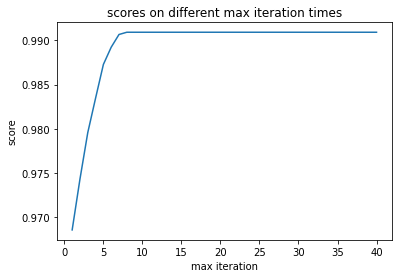

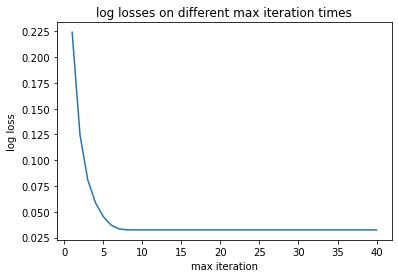

In [8]:
import matplotlib.pyplot as plt

fig1 = plt.figure('scores').add_subplot(111)
fig1.plot(list,scores)

fig2 = plt.figure('log losses').add_subplot(111)
fig2.plot(list,losses)

fig1.set_title('scores on different max iteration times')
fig1.set_xlabel('max iteration')
fig1.set_ylabel('score')

fig2.set_title('log losses on different max iteration times')
fig2.set_xlabel('max iteration')
fig2.set_ylabel('log loss')

plt.show()

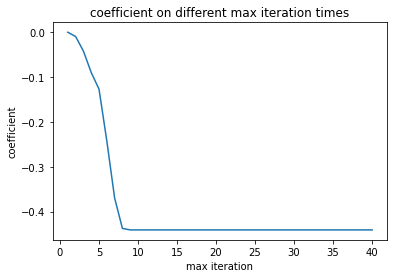

In [9]:
# 1-2
data = []
for i in range(40):
    data.append(co[i][0][0])

fig3 = plt.figure('coefficients').add_subplot(111)
fig3.plot(list,data)

fig3.set_title('coefficient on different max iteration times')
fig3.set_xlabel('max iteration')
fig3.set_ylabel('coefficient')

plt.show()

In [20]:
# the graph looks like this because what we want to understand is about the pixel000. As we iterate more, we find that the pixel000 becomes less important
# So the coefficients keeps getting lower to be more negative, and when the coefficient value goes to -0.4, we think it is negative enough, and we stop to 
# let it become more negative. 

In [39]:
# 1-3
C_grid = np.logspace(-9, 6, 31)
train_loss_list = []
test_loss_list = []
least_test_loss = 999999


for c in C_grid:
    lib_model = lm.LogisticRegression(C=c,solver='liblinear')
    lib_model.fit(x_train, y_train)
    
    prob=lib_model.predict_proba(x_train)
    loss=m.log_loss(y_train,prob)
    train_loss_list.append(loss)
    
    prob=lib_model.predict_proba(x_test)
    loss=m.log_loss(y_test,prob)
    test_loss_list.append(loss)
    
    if loss<least_test_loss:
        least_test_loss=loss
        best_C=c
        best_predict=prob
        model = lib_model
        best_score=lib_model.score(x_test,y_test)

In [40]:
C_grid

array([1.00000000e-09, 3.16227766e-09, 1.00000000e-08, 3.16227766e-08,
       1.00000000e-07, 3.16227766e-07, 1.00000000e-06, 3.16227766e-06,
       1.00000000e-05, 3.16227766e-05, 1.00000000e-04, 3.16227766e-04,
       1.00000000e-03, 3.16227766e-03, 1.00000000e-02, 3.16227766e-02,
       1.00000000e-01, 3.16227766e-01, 1.00000000e+00, 3.16227766e+00,
       1.00000000e+01, 3.16227766e+01, 1.00000000e+02, 3.16227766e+02,
       1.00000000e+03, 3.16227766e+03, 1.00000000e+04, 3.16227766e+04,
       1.00000000e+05, 3.16227766e+05, 1.00000000e+06])

In [42]:
print("least log loss:{} C:{},score:{} ".format(least_test_loss,best_C,best_score))

least log loss:0.08968955638337095 C:0.03162277660168379,score:0.9672213817448311 


In [43]:
def calc_confusion_matrix_for_threshold(ytrue_N, yproba1_N, thresh=0.5):
    ''' Compute the confusion matrix for a given probabilistic classifier and threshold
    
    Args
    ----
    ytrue_N : 1D array of floats
        Each entry represents the binary value (0 or 1) of 'true' label of one example
        One entry per example in current dataset
    yproba1_N : 1D array of floats
        Each entry represents a probability (between 0 and 1) that correct label is positive (1)
        One entry per example in current dataset
        Needs to be same size as ytrue_N
    thresh : float
        Scalar threshold for converting probabilities into hard decisions
        Calls an example "positive" if yproba1 >= thresh
        Default value reflects a majority-classification approach (class is the one that gets
        highest probability)

    Returns
    -------
    cm_df : Pandas DataFrame
        Can be printed like print(cm_df) to easily display results
    '''
    cm = m.confusion_matrix(ytrue_N, yproba1_N >= thresh)
    cm_df = pd.DataFrame(data=cm, columns=[0, 1], index=[0, 1])
    cm_df.columns.name = 'Predicted'
    cm_df.index.name = 'True'
    return cm_df

In [44]:
print(calc_confusion_matrix_for_threshold(y_test,best_predict[:,1],0.5))

Predicted    0    1
True               
0          942   32
1           33  976


In [45]:
def calc_TP_TN_FP_FN(ytrue_N, yhat_N):
    '''
    
    Args
    ----
    ytrue_N : 1D array of floats
        Each entry represents the binary value (0 or 1) of 'true' label of one example
        One entry per example in current dataset
    yhat_N : 1D array of floats
        Each entry represents a predicted binary value (either 0 or 1).
        One entry per example in current dataset.
        Needs to be same size as ytrue_N.

    Returns
    -------
    TP : int
        Number of true positives
    TN : int
        Number of true negatives
    FP : int
        Number of false positives
    FN : int
        Number of false negatives
    '''
    TP = 0.0
    TN = 0.0
    FP = 0.0
    FN = 0.0
    tp_list = []
    tn_list = []
    fp_list = []
    fn_list = []
    
    index = 0
    for i, j in zip(ytrue_N, yhat_N):
        if (i == 1) & (j == 1):
            TP += 1
            tp_list.append(index)
        elif (i == 0) & (j == 0):
            TN += 1
            tn_list.append(index)
        elif (i == 0) & (j == 1):
            FP += 1
            fp_list.append(index)
        else:
            FN += 1
            fn_list.append(index)
        index = index + 1
#     length = len(ytrue_N)
#     TP /= length
#     TN /= length
#     FP /= length
#     FN /= length
    
    return tp_list, tn_list, fp_list, fn_list

In [46]:
lst =  best_predict[:,1]>=0.5

In [47]:
# 1-4

tpl,tnl,fpl,fnl= calc_TP_TN_FP_FN(y_test, lst)



Text(0.5, 0.98, 'FN samples')

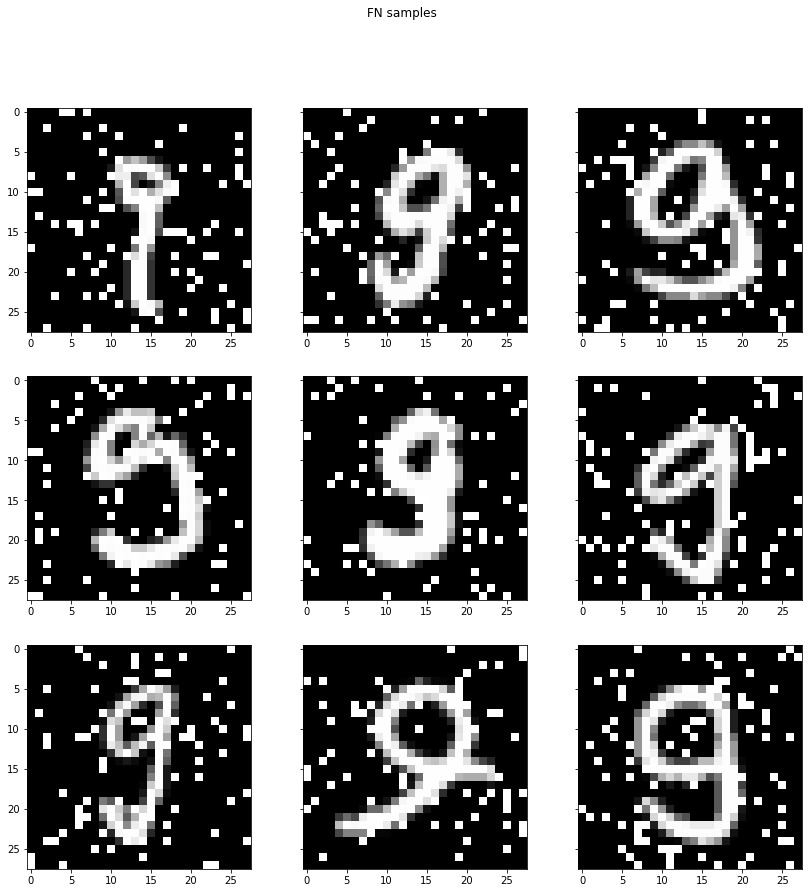

In [48]:
import pandas

def data_handle(a,b):
    if a%b !=0:
        return a//b,a%b-1
    
    return a//b-1,b-1


fig, axs = plt.subplots(3, 3, figsize =(14,14), sharey=True)
for index in range(9):
    a, b = data_handle(index, 3)
    df = pd.DataFrame(x_test)
    arr = pd.DataFrame(np.array(df.iloc[fnl[index]]).reshape(28, 28))
    axs[a, b].imshow(arr, cmap='gray', vmin=0.0, vmax=1.0)
    

    
fig.suptitle('FN samples')


In [49]:
# the original picture should be a 9 and the machine predicts it as a 8. 
# I think the machine at first learn how a 8 looks like. However, the 8 and the 9 looks very similar and sometimes
# the data is noisy, which makes the 8 and 9 looks more similar. The machine cannot understand it, so it predicts the 9 to be a 8.

In [50]:
fpl

[37,
 69,
 77,
 101,
 156,
 174,
 219,
 290,
 344,
 352,
 355,
 401,
 440,
 464,
 580,
 712,
 787,
 809,
 896,
 918,
 926,
 948,
 984,
 998,
 1004,
 1068,
 1313,
 1322,
 1327,
 1427,
 1508,
 1672]

Text(0.5, 0.98, 'FP samples')

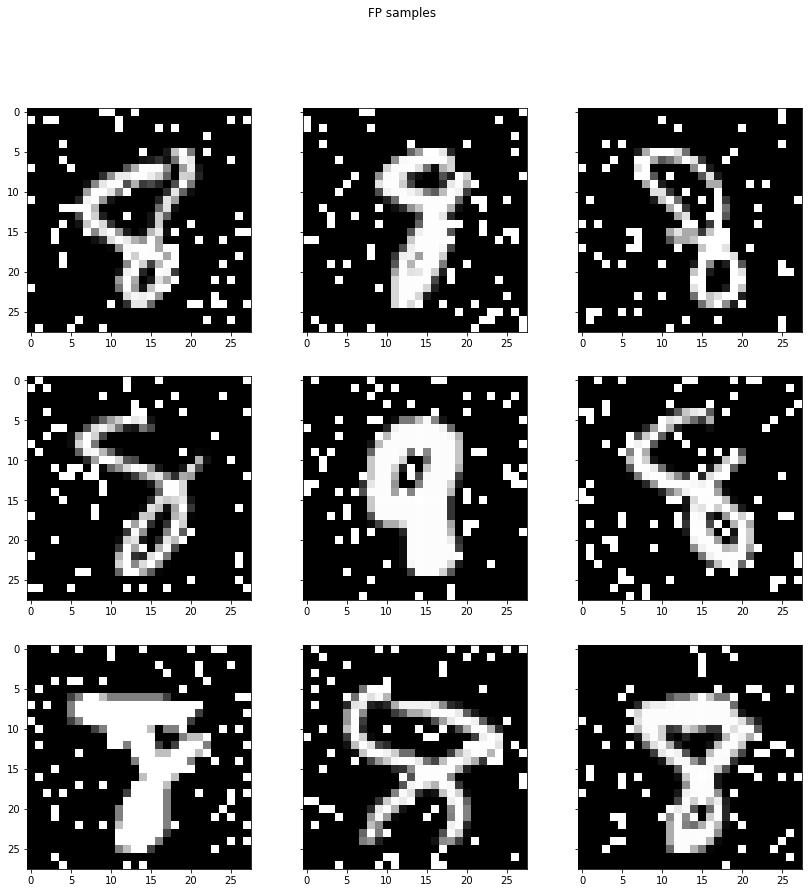

In [51]:
# tpl,tnl,fpl,fnl= calc_TP_TN_FP_FN(y_test, lst)

fig, axs = plt.subplots(3, 3, figsize =(14,14), sharey=True)

for index in range(9):
    a, b = data_handle(index, 3)
    df = pd.DataFrame(x_test)
    arr = pd.DataFrame(np.array(df.iloc[fpl[index]]).reshape(28, 28))
    axs[a, b].imshow(arr, cmap='gray', vmin=0.0, vmax=1.0)
    
fig.suptitle('FP samples')

In [52]:
# the original picture should be a 8 and the machine predicts it as a 9. 
# I think the machine at first learn how a 9 looks like. However, the 8 and the 9 looks very similar and sometimes
# the data is noisy, which makes the 8 and 9 looks more similar. The machine cannot understand it, so it predicts the 8 to be a 9.

Text(0.5, 1.0, 'coefficients distribution')

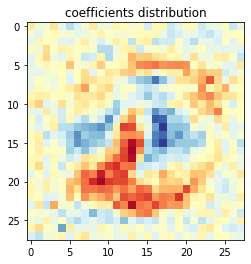

In [53]:
# 1-5

axes=plt.axes()
array =np.array(model.coef_).reshape(28,28)
axes.imshow(array,cmap='RdYlBu',vmin=-0.5,vmax=0.5)
plt.title("coefficients distribution")

In [ ]:
# logistic regression learn the red part to be negative, so the final prediction should be smaller than 0.5 to make it have a
# negative label instead of negative value
# logictic regression learn the blue part to be positive, so the final prediction should be greater than 0.5 to make it have a 
# positive label instead of positive value. 

In [ ]:
# Part2

In [68]:
tx_train = np.loadtxt('./data_trouser_dress/troudress_train_x.csv', delimiter=',', skiprows=1)
tx_test = np.loadtxt('./data_trouser_dress/troudress_test_x.csv', delimiter=',', skiprows=1)

ty_train = np.loadtxt('./data_trouser_dress/troudress_train_y.csv', delimiter=',', skiprows=1)


In [80]:
from sklearn.model_selection import train_test_split

x_train, x_test, y_train, y_test = train_test_split(tx_train ,ty_train, test_size=0.2, random_state=23)

NameError: name 'prediction_list' is not defined

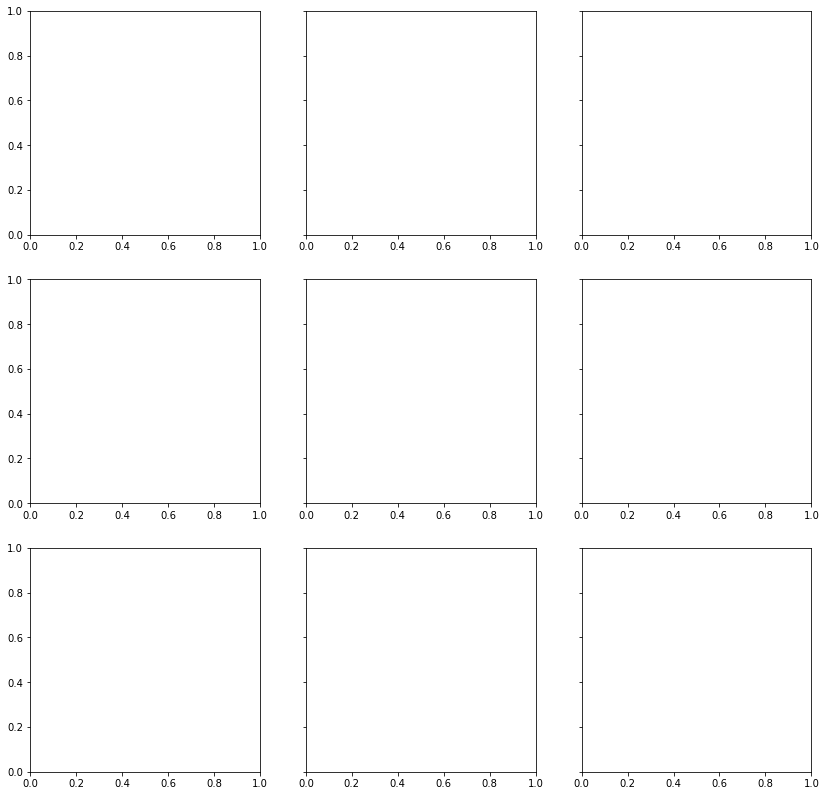

In [81]:
random.seed(300)

fig, axs = plt.subplots(3, 3, figsize =(14,14), sharey=True)
for subplot_id, prediction in enumerate(prediction_list):
        # order data for display
    data_frame = pd.DataFrame(data=[x[:, 0], prediction]).T
    data_frame = data_frame.sort_values(by=0)
    x_sorted = data_frame.iloc[:, :-1].values
    prediction_sorted = data_frame.iloc[:, 1].values

    ax = axs.flat[subplot_id]
    ax.set_title('degree = %d; MSE = %.3f' % (polynomials[subplot_id], error_list[subplot_id]))
    ax.plot(x, y, 'r.')
    ax.plot(x_sorted, prediction_sorted, color='blue')
        
plt.show()

In [83]:
C_grid = np.logspace(-9, 6, 31)
train_loss_list = []
test_loss_list = []
least_train_loss = 999999

for c in C_grid:
    lib_model = lm.LogisticRegression(max_iter=i,solver='liblinear')
    lib_model.fit(x_train, y_train)
    
    prob=lib_model.predict_proba(x_train)
    loss=m.log_loss(y_train,prob)
    train_loss_list.append(loss)
    
    prob=lib_model.predict_proba(x_test)
    loss=m.log_loss(y_test,prob)
    test_loss_list.append(loss)
    
    
    
    if loss<least_train_loss:
        least_train_loss=loss
        C=c
        best_predict=prob
        model = lib_model
        best_score=lib_model.score(x_test,y_test)

C:\Users\12866\miniconda3\envs\ml135_env_sp21\lib\site-packages\sklearn\svm\_base.py:1206: ConvergenceWarning: Liblinear failed to converge, increase the number of iterations.
  warnings.warn(
C:\Users\12866\miniconda3\envs\ml135_env_sp21\lib\site-packages\sklearn\svm\_base.py:1206: ConvergenceWarning: Liblinear failed to converge, increase the number of iterations.
  warnings.warn(
C:\Users\12866\miniconda3\envs\ml135_env_sp21\lib\site-packages\sklearn\svm\_base.py:1206: ConvergenceWarning: Liblinear failed to converge, increase the number of iterations.
  warnings.warn(
C:\Users\12866\miniconda3\envs\ml135_env_sp21\lib\site-packages\sklearn\svm\_base.py:1206: ConvergenceWarning: Liblinear failed to converge, increase the number of iterations.
  warnings.warn(
C:\Users\12866\miniconda3\envs\ml135_env_sp21\lib\site-packages\sklearn\svm\_base.py:1206: ConvergenceWarning: Liblinear failed to converge, increase the number of iterations.
  warnings.warn(
C:\Users\12866\miniconda3\envs\ml13